##### 0. CONFIGURAÇÃO DO AMBIENTE

  * Não é preciso fazer nada aqui*

0.1 Configuração do ambiente

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


0.2 Criação de funções

In [2]:
# Função para calcular os índices contábeis
def calcular_indices_contabeis(df):
    indices = {}
    
    indices['Liquidez Corrente'] = df['Ativo Circulante'] / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Passivo Circulante: BP
    # => A liquidez corrente mede a capacidade da empresa de pagar suas obrigações de curto prazo.

    indices['Liquidez Seca'] = (df['Ativo Circulante'] - df['Estoques']) / df['Passivo Circulante']
    # Ativo Circulante: BP
    # Estoque: BP
    # Passivo Circulante: BP
    # => A liquidez seca é uma medida de liquidez que desconsidera o estoque da empresa.

    indices['Margem Líquida'] = df['Lucro Líquido'] / df['Receita Total']
    # Lucro Líquido: DRE
    # Receita Total: DRE
    # => A margem líquida mede a porcentagem de lucro líquido que a empresa gera para cada real de receita.

    indices['ROA'] = df['Lucro Líquido'] / df['Ativo Total']
    # Lucro Líquido: DRE
    # Ativo Total: BP
    # => O retorno sobre ativos (ROA) mede a eficiência da empresa em gerar lucro a partir de seus ativos.

    indices['ROE'] = df['Lucro Líquido'] / df['Patrimônio Líquido']
    # Lucro Líquido: DRE
    # Patrimônio Líquido: BP
    # => O retorno sobre o patrimônio líquido (ROE) mede a eficiência da empresa em gerar lucro a partir de seu patrimônio líquido.

    indices['Endividamento'] = df['Passivo Total'] / df['Ativo Total']
    # Passivo Total: BP
    # Ativo Total: BP
    # => O endividamento mede a proporção de dívidas da empresa em relação ao total de ativos.

    indices['Cobertura de Juros'] = df['EBIT'] / df['Despesa de Juros']
    # EBIT: DRE (Lucro antes de juros e impostos)
    # Despesa de Juros: DRE
    # => A cobertura de juros mede a capacidade da empresa de pagar seus juros com seu lucro antes de juros e impostos.
    # => Reflete a capacidade de gerar resultados com suas atividades principais
    
    indices['Giro do Ativo'] = df['Receita Total'] / df['Ativo Total']
    # Ativo Total: BP
    # Receita Total: DRE
    # => O giro do ativo mede a eficiência da empresa em gerar receita a partir de seus ativos.

    indices['Período Médio de Recebimento'] = df['Contas a Receber'] / df['Receita Total'] * 365
    # Contas a Receber: BP
    # Receita Total: DRE
    # => O período médio de recebimento mede o tempo médio que a empresa leva para receber suas vendas.

    indices['Período Médio de Pagamento'] = df['Contas a Pagar'] / df['Custos'] * 365
    # Contas a Pagar: BP
    # Custos: DRE
    # => O período médio de pagamento mede o tempo médio que a empresa leva para pagar seus custos.

    return pd.DataFrame(indices)



In [3]:
# Função para categorizar escores consolidados
def categorizar_escores_consolidados(escores):
    categorias = []
    for escore in escores:
        if escore > 2:
            categorias.append("Muito Abaixo do Risco")
        elif 1 < escore <= 2:
            categorias.append("Abaixo do Risco")
        elif -1 <= escore <= 1:
            categorias.append("Neutro")
        elif -2 <= escore < -1:
            categorias.append("Acima do Risco")
        else:
            categorias.append("Muito Acima do Risco")
    return categorias

**Passo 1**

*Lançamento dos dados pelo funcionário (analista, economiário, escriturário)*

##### 1. LANÇAMENTO DOS DADOS #####

1.1 Cliente

In [4]:
cliente = 'GLOBAL AGRONEGOCIOS LTDA ME'

1.2 Importação dos Dados Contábeis

In [5]:
## Importar os dados do Excel
# - Lance os dados no arquivo Excel
# - Do mais recente para o mais antigo
# - Confirme o nome do arquivo e atere-o se necessário

arquivo_dados_contabeis = '0.96 - ALPHA - Teste Global\dados_contabeis_global.xlsx'

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ferna\AppData\Local\Temp\ipykernel_20232\2974781740.py:6: SyntaxWarning: invalid escape sequence '\d'
  arquivo_dados_contabeis = '0.96 - ALPHA - Teste Global\dados_contabeis_global.xlsx'


1.3 Leitura dos Dados Contábeis

In [6]:

df_dados_contabeis = pd.read_excel(arquivo_dados_contabeis)  # Insira o nome correto do arquivo
print("Dados Contabeis Importados:")
print(df_dados_contabeis)

Dados Contabeis Importados:
   Ano  Ativo Circulante  Passivo Circulante   Estoques  Lucro Líquido  \
0    1        2593954.47           727602.60  383912.38       39546.67   
1    2        2877244.94          1301079.74  148715.61      455923.83   
2    3         492603.10           262306.70  152802.05      495703.34   

   Receita Total  Ativo Total  Patrimônio Líquido  Passivo Total       EBIT  \
0    42985389.70   3741944.68            172180.0     3569764.68  -98569.70   
1    57707592.41   4477462.29             30000.0     4447462.29  296881.49   
2    72929552.94   2251497.29            672808.5     1578688.79  495639.94   

   Despesa de Juros  Contas a Receber  Contas a Pagar       Custos  
0         508100.66        1840099.99        58045.98  39808852.31  
1         151309.73        1387919.34      1170010.10  54454968.68  
2         178001.66              0.00        35619.86  68254032.67  


**Passo 2**

*Cálculo do modelo Finscore 5A*

##### 2. PROCESSAMENTO DO MODELO #####

2.1 Índices contábeis

In [7]:
df_indices = calcular_indices_contabeis(df_dados_contabeis)
print("\nÍndices Contábeis Calculados:")
print(df_indices)


Índices Contábeis Calculados:
   Liquidez Corrente  Liquidez Seca  Margem Líquida       ROA        ROE  \
0           3.565070       3.037430        0.000920  0.010568   0.229682   
1           2.211429       2.097127        0.007901  0.101826  15.197461   
2           1.877966       1.295434        0.006797  0.220166   0.736767   

   Endividamento  Cobertura de Juros  Giro do Ativo  \
0       0.953986           -0.193996      11.487447   
1       0.993300            1.962078      12.888460   
2       0.701173            2.784468      32.391579   

   Período Médio de Recebimento  Período Médio de Pagamento  
0                     15.624762                    0.532213  
1                      8.778577                    7.842327  
2                      0.000000                    0.190483  


2.2 Padronização dos índices contábeis

In [8]:
# Escalar os índices contábeis para o PCA
scaler = StandardScaler()
indices_scaled = scaler.fit_transform(df_indices)
print("\nÍndices Escalados para PCA:")
print(indices_scaled)


Índices Escalados para PCA:
[[ 1.38937204  1.25590459 -1.39884051 -1.16874825 -0.7433285   0.54979428
  -1.36274591 -0.77925395  1.1712727  -0.65814125]
 [-0.46613845 -0.06490012  0.87951446 -0.10520593  1.41358414  0.85350646
   0.35397002 -0.6324163   0.10072376  1.41310825]
 [-0.9232336  -1.19100447  0.51932605  1.27395418 -0.67025564 -1.40330074
   1.00877589  1.41167025 -1.27199646 -0.754967  ]]


2.3 Cálculo do PCA

In [9]:
# Realizar o PCA
pca = PCA()
pca_result = pca.fit_transform(indices_scaled)
print("\nComponentes Principais (PCA):")
print(pca_result)

#relatório



Componentes Principais (PCA):
[[ 3.23434967e+00 -1.22209421e+00  3.21742883e-16]
 [-4.98685598e-02  2.50251532e+00  3.21742883e-16]
 [-3.18448111e+00 -1.28042111e+00  3.21742883e-16]]


2.4 Variância Explicada PCA

In [10]:
# Variância explicada pelos componentes principais
explained_variance_ratio = pca.explained_variance_ratio_
print("\nVariância Explicada por Componente:")
print(explained_variance_ratio)

#relatório


Variância Explicada por Componente:
[6.86814153e-01 3.13185847e-01 1.03518483e-32]


2.5 DataFrame PCA

In [11]:
# DataFrame com os componentes principais
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
print("\nMatriz de Componentes Principais:")
print(pca_df)

#relatório


Matriz de Componentes Principais:
        PC1       PC2           PC3
0  3.234350 -1.222094  3.217429e-16
1 -0.049869  2.502515  3.217429e-16
2 -3.184481 -1.280421  3.217429e-16


2.6 Matriz de cargas

In [12]:
# Obter a matriz de cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=df_indices.columns,
    index=[f"PC{i+1}" for i in range(pca.components_.shape[0])]
)

print("Matriz de Cargas dos Componentes Principais:")
print(loadings)

# Identificar os índices mais significativos para cada PC
print("\nÍndices mais significativos por componente:")
for pc in loadings.index:
    print(f"\n{pc}:")
    print(loadings.loc[pc].abs().sort_values(ascending=False).head(3))  # Top 3 índices mais significativos

#relatório

Matriz de Cargas dos Componentes Principais:
     Liquidez Corrente  Liquidez Seca  Margem Líquida       ROA       ROE  \
PC1           0.361912       0.381375       -0.301973 -0.380102 -0.016514   
PC2          -0.179056      -0.018334        0.345435 -0.049615  0.564536   
PC3           0.614554      -0.535025        0.037186 -0.303627 -0.003115   

     Endividamento  Cobertura de Juros  Giro do Ativo  \
PC1       0.301122           -0.370681      -0.338970   
PC2       0.347060            0.134059      -0.259467   
PC3       0.074172           -0.004897       0.400840   

     Período Médio de Recebimento  Período Médio de Pagamento  
PC1                      0.380206                    0.009952  
PC2                      0.047826                    0.564873  
PC3                     -0.035780                    0.273883  

Índices mais significativos por componente:

PC1:
Liquidez Seca                   0.381375
Período Médio de Recebimento    0.380206
ROA                         

2.6 Escore final

In [13]:
pca_df.dot(explained_variance_ratio)

0    1.838655
1    0.749502
2   -2.588156
dtype: float64

##### 3. RESULTADOS #####

3.1 Valor do Escore Calculado

In [14]:
# Calcular o escore consolidado com penalização do último ano
# Do mais recente para o mais antigo: 0.5, 0.3, 0.2
pesos = [0.5, 0.3, 0.2]  # Pesos para os três anos
escores_consolidados = (pca_df.dot(explained_variance_ratio) * pesos).sum()
print("\nEscore Consolidado:")
print(escores_consolidados)


Escore Consolidado:
0.6265465505063744


3.2 Classificação do Escore

In [15]:
# Categorizar os escores consolidados
categoria = categorizar_escores_consolidados([escores_consolidados])
print("\nCategoria Final:")
print(categoria)


Categoria Final:
['Neutro']


3.3 Valores e Contas Contábeis

In [16]:
print(df_dados_contabeis)

   Ano  Ativo Circulante  Passivo Circulante   Estoques  Lucro Líquido  \
0    1        2593954.47           727602.60  383912.38       39546.67   
1    2        2877244.94          1301079.74  148715.61      455923.83   
2    3         492603.10           262306.70  152802.05      495703.34   

   Receita Total  Ativo Total  Patrimônio Líquido  Passivo Total       EBIT  \
0    42985389.70   3741944.68            172180.0     3569764.68  -98569.70   
1    57707592.41   4477462.29             30000.0     4447462.29  296881.49   
2    72929552.94   2251497.29            672808.5     1578688.79  495639.94   

   Despesa de Juros  Contas a Receber  Contas a Pagar       Custos  
0         508100.66        1840099.99        58045.98  39808852.31  
1         151309.73        1387919.34      1170010.10  54454968.68  
2         178001.66              0.00        35619.86  68254032.67  


3.4 Índices contábeis

In [17]:
print(df_indices)

   Liquidez Corrente  Liquidez Seca  Margem Líquida       ROA        ROE  \
0           3.565070       3.037430        0.000920  0.010568   0.229682   
1           2.211429       2.097127        0.007901  0.101826  15.197461   
2           1.877966       1.295434        0.006797  0.220166   0.736767   

   Endividamento  Cobertura de Juros  Giro do Ativo  \
0       0.953986           -0.193996      11.487447   
1       0.993300            1.962078      12.888460   
2       0.701173            2.784468      32.391579   

   Período Médio de Recebimento  Período Médio de Pagamento  
0                     15.624762                    0.532213  
1                      8.778577                    7.842327  
2                      0.000000                    0.190483  


##### 4. APRESENTAÇÃO #####

A imagem foi salva como 'resultados_completos.png'


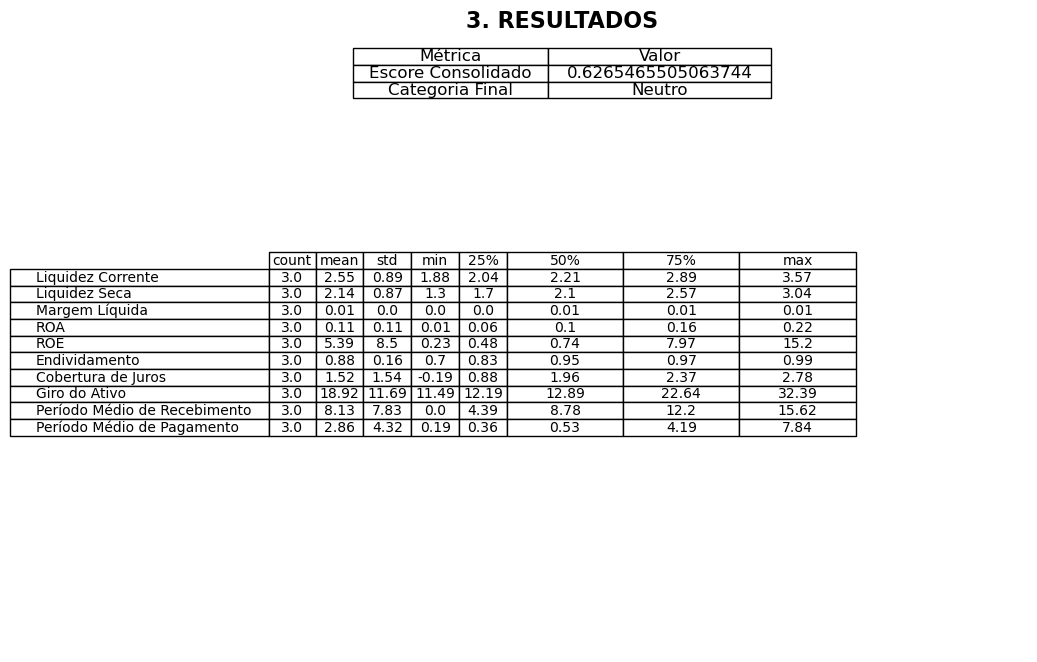

In [21]:

# Criar DataFrame para os resultados principais
resultados_df = pd.DataFrame({
    "Métrica": ["Escore Consolidado", "Categoria Final"],
    "Valor": [escores_consolidados, categoria[0]]
})

# Criar DataFrame de estatísticas descritivas dos índices contábeis
df_indices_summary = df_indices.describe().transpose()

# Criar a figura principal para exibir as tabelas juntas
fig, ax = plt.subplots(figsize=(12, 8))  # Ajuste de tamanho para caber ambas as tabelas
ax.set_title("3. RESULTADOS", fontsize=16, fontweight="bold")
ax.axis("tight")
ax.axis("off")

# Criar tabela dos resultados principais na parte superior
tabela1 = ax.table(cellText=resultados_df.values,
                   colLabels=resultados_df.columns,
                   cellLoc="center",
                   loc="upper center")

# Criar tabela dos índices contábeis abaixo da primeira tabela
tabela2 = ax.table(cellText=df_indices_summary.round(2).values,
                   colLabels=df_indices_summary.columns,
                   rowLabels=df_indices_summary.index,
                   cellLoc="center",
                   loc="center")

# Ajustar estilos das tabelas
tabela1.auto_set_font_size(False)
tabela1.set_fontsize(12)
tabela1.auto_set_column_width([0, 1])

tabela2.auto_set_font_size(False)
tabela2.set_fontsize(10)
tabela2.auto_set_column_width([0, 1, 2, 3, 4])

# Salvar a imagem final
# plt.savefig("resultados_completos.png", bbox_inches="tight", dpi=300)

print("A imagem foi salva como 'resultados_completos.png'")
